In [1]:
import numpy as np
import cv2
import os
path="D://datasets//Toy_videos//frame_file_example3"

In [2]:
from tqdm import tqdm
#converting each image into vectors
image_vec_matr,image_vec_matb,image_vec_matg=[],[],[];
listdir=os.listdir(path);
for i in tqdm((listdir)):
    img=cv2.resize(cv2.imread(os.path.join(path,i)),(50,50));
    imgr=img[:,:,2];
    imgg=img[:,:,1];
    imgb=img[:,:,0];
    imgr=imgr.reshape(imgr.shape[0]*imgr.shape[1],1);
    imgb=imgb.reshape(imgb.shape[0]*imgb.shape[1],1);
    imgg=imgg.reshape(imgg.shape[0]*imgg.shape[1],1);
    image_vec_matr.append(imgr);
    image_vec_matb.append(imgb);
    image_vec_matg.append(imgg);
image_vec_matr=np.array(image_vec_matr)
image_vec_matb=np.array(image_vec_matb)
image_vec_matg=np.array(image_vec_matg)

100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:05<00:00, 25.29it/s]


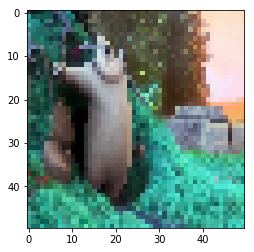

In [4]:
import matplotlib.pyplot as plt
plt.imshow(img);

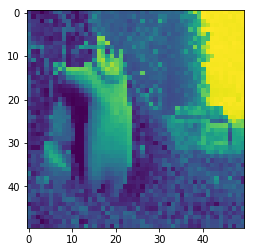

In [14]:
plt.imshow(img[:,:,0])

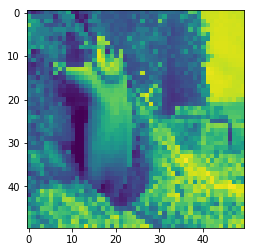

In [15]:
plt.imshow(img[:,:,1])

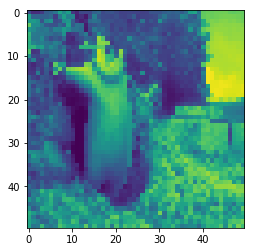

In [17]:
plt.imshow(img[:,:,2])

# Red_Layer

In [18]:
size=image_vec_matr.shape;
print(size)
image_vec_mat=image_vec_matr.reshape(size[0],size[1])
u,s,v=np.linalg.svd(image_vec_mat)

(132, 2500, 1)


In [19]:
print(u.shape,s.shape,v.shape)
maxi=0;size=s.shape[0];
u_final,s_f,v_final=[],[],[]
n_components=132
for i in range(n_components):
    maxi=0
    for j in range(size):
        if(s[j]>maxi):
            maxi=s[j];
            arg=j;
    u_hat=u[:,arg];
    v_hat=v[arg,:];
    u_final.append(u_hat)
    v_final.append(v_hat)
    s_f.append(maxi);
    s[arg]=-1000

(132, 132) (132,) (2500, 2500)


In [20]:
s_f

[71676.91881751578,
 11251.69208488252,
 5266.259412305577,
 4617.639866268906,
 3632.8539614964448,
 3066.6165574660517,
 2499.598791651705,
 2389.0158955283573,
 2330.3374599597028,
 1887.8784027416548,
 1749.3904222745377,
 1624.136234588596,
 1507.639361273159,
 1380.1064549763612,
 1323.7128490155685,
 1198.5687825791356,
 1173.308377069816,
 1117.605112742288,
 1031.527248441293,
 992.6111423396895,
 976.0474132977959,
 900.1215084005631,
 865.5460078258635,
 825.8928970978848,
 793.9017734195071,
 769.629982405649,
 733.9321288423534,
 683.3783196464764,
 660.2759882751593,
 634.6601101290299,
 607.2640125041484,
 591.7553250898903,
 585.6789463197211,
 570.4619627719868,
 546.4311379195041,
 537.6936512889076,
 523.2997974632367,
 502.2828534407169,
 495.6525115328339,
 475.3746313143903,
 461.982368749088,
 454.4296778919781,
 437.74030742151683,
 429.4493530645185,
 420.0187160407741,
 413.6951780806371,
 402.1043358551348,
 395.08534890633405,
 384.88915462296205,
 381.20407

In [21]:
s_mat=[];
for i in range(n_components):
    s_1=[]
    for j in range(n_components):
        if(i==j):
            s_1.append(s_f[i]);
        else:
            s_1.append(0);
    s_1=np.array(s_1);
    s_mat.append(s_1)
s_mat=np.array(s_mat)
u_final=np.array(u_final);
v_final=np.array(v_final);
print(u_final.shape,s_mat.shape,v_final.shape)
recon_imgr=np.matmul(np.transpose(u_final),s_mat)
recon_imgr=np.matmul(recon_imgr,v_final)
recon_imgr=recon_imgr.astype(np.uint8)

(132, 132) (132, 132) (132, 2500)


In [23]:
recon_imgr

array([[112, 131,  82, ..., 172, 176, 176],
       [111, 131,  82, ..., 173, 176, 177],
       [124, 124,  79, ..., 167, 181, 174],
       ...,
       [ 57,  31,  33, ..., 150, 199, 174],
       [ 58,  31,  33, ..., 150, 200, 174],
       [ 58,  31,  33, ..., 150, 200, 174]], dtype=uint8)

In [25]:
error=image_vec_mat-recon_imgr
print(np.linalg.norm(error,'fro'))

341.2858039825272


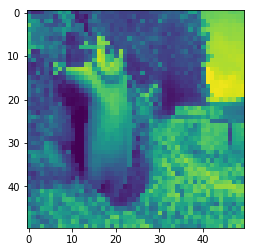

In [27]:
plt.imshow(recon_imgr[-1].reshape(50,50))

# Generalizing by creating function

In [40]:
class SVD_comp:
    def __init__(self,path,image_cap_path,imr,imb,img,vnm,n_components,storage_path,partition=False):
        self.path=path;#to store video path
        self.image_cap_path=image_cap_path#to store frames
        self.image_red_path=imr#reconstructed red layer images
        self.image_blue_path=imb#reconstructed blue layer images
        self.image_green_path=img#reconstructed greenlayer images
        self.video_nm=vnm;#Video name
        self.n_components=n_components;#Number of components
        self.storage_path=storage_path;#final video storage path
        self.image_vec_matr=None#red layer separation matrix
        self.image_vec_matg=None#green layer separated matrix
        self.image_vec_matb=None#Blue layer separated matrix
        print("SVD compression Initiating...\n")
        if partition==True:
            self.partition_video();
        self.capturing_image_data();
        self.recon_r=self.svd_compression(self.image_vec_matr,'Red')
        self.recon_g=self.svd_compression(self.image_vec_matg,'Green')
        self.recon_b=self.svd_compression(self.image_vec_matb,'Blue')
        print("Compression complete");
        print("Compression obtained:",self.calculate_compression())
    def partition_video(self):
        video_obj=cv2.VideoCapture(self.path)
        still_extract=1;count=0;frame=None
        while still_extract:
            still_extract,image=video_obj.read();#using default sampling rate of opencv
            frame="frame_"+str(count)+".jpg";
            cv2.imwrite(os.path.join(self.image_cap_path,frame),image)
            count+=1;
        os.remove(frame);
    def capturing_image_data(self):
        image_vec_matr,image_vec_matb,image_vec_matg=[],[],[];
        listdir=os.listdir(self.image_cap_path);
        self.img_number=len(listdir);
        self.reshape_size=(100,100)
        self.image_shape=cv2.resize(cv2.imread(os.path.join(self.image_cap_path,listdir[0])),self.reshape_size).shape;
        for i in tqdm((listdir)):
            img=cv2.resize(cv2.imread(os.path.join(self.image_cap_path,i)),self.reshape_size);
            imgr=img[:,:,2];
            imgg=img[:,:,1];
            imgb=img[:,:,0];
            imgr=imgr.reshape(imgr.shape[0]*imgr.shape[1],1);
            imgb=imgb.reshape(imgb.shape[0]*imgb.shape[1],1);
            imgg=imgg.reshape(imgg.shape[0]*imgg.shape[1],1);
            image_vec_matr.append(imgr);
            image_vec_matb.append(imgb);
            image_vec_matg.append(imgg);
        self.image_vec_matr=np.array(image_vec_matr)
        self.image_vec_matb=np.array(image_vec_matb)
        self.image_vec_matg=np.array(image_vec_matg)
    def svd_compression(self,image_vec_mat,name):
        size=image_vec_mat.shape;
        #print(size)
        image_vec_mat=image_vec_mat.reshape(size[0],size[1])
        u,s,v=np.linalg.svd(image_vec_mat)
        maxi=0;size=s.shape[0];
        u_final,s_f,v_final=[],[],[]
        for i in range(self.n_components):
            maxi=0
            for j in range(size):
                if(s[j]>maxi):
                    maxi=s[j];
                    arg=j;
            u_hat=u[:,arg];
            v_hat=v[arg,:];
            u_final.append(u_hat)
            v_final.append(v_hat)
            s_f.append(maxi);
            s[arg]=-1000
        s_mat=[];
        for i in range(self.n_components):
            s_1=[]
            for j in range(self.n_components):
                if(i==j):
                    s_1.append(s_f[i]);
                else:
                    s_1.append(0);
            s_1=np.array(s_1);
            s_mat.append(s_1)
        s_mat=np.array(s_mat)
        u_final=np.array(u_final);
        v_final=np.array(v_final);
        self.u_shape,self.v_shape=u_final.shape,v_final.shape
        print(u_final.shape,s_mat.shape,v_final.shape)
        comp=1-(u_final.shape[0]*u_final.shape[1]+self.n_components+v_final.shape[0]*v_final.shape[1])/(self.image_shape[0]*self.image_shape[1])
        recon_img=np.matmul(np.transpose(u_final),s_mat)
        recon_img=np.matmul(recon_img,v_final)
        recon_img=recon_img.astype(np.uint8)
        error=image_vec_mat-recon_img
        print("Error in Layer",name,"is:",np.linalg.norm(error,'fro'))
        img_arr=[];
        if(name=='Red'):
            path=self.image_red_path;
        elif(name=='Green'):
            path=self.image_green_path;
        elif(name=='Blue'):
            path=self.image_blue_path;
        else:
            print("Improper choice of image layer. Please check it properly and re-enter");
        for i in range(u.shape[0]):
            img_sep=recon_img[i].reshape(self.reshape_size[0],self.reshape_size[1]);
            img_sep=cv2.resize(img_sep,(480,270))
            fr=path+"//frame_"+str(i)+".jpg";
            cv2.imwrite(fr,img_sep);
        return recon_img
    def calculate_compression(self):
        return 1-(self.u_shape[0]*self.u_shape[1]+self.n_components+self.v_shape[0]*self.v_shape[1])/(self.image_shape[0]*self.image_shape[1]*self.img_number)

In [41]:
path="D://datasets//Toy_videos//Sample Videos _ Dummy Videos For Demo Use.mp4"
image_cap_path="D://datasets//Toy_videos//frame_file_example3"
imr="D://datasets//Toy_videos//frame_file_red"
imb="D://datasets//Toy_videos//frame_file_blue"
img="D://datasets//Toy_videos//frame_file_green"
vnm="finale_video.avi"
n_components=10
storage_path="D://datasets//Toy_videos"
s=SVD_comp(path,image_cap_path,imr,imb,img,vnm,n_components,storage_path)

SVD compression Initiating...



100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:01<00:00, 84.48it/s]


(10, 132) (10, 10) (10, 10000)
Error in Layer Red is: 173683.00408214962
(10, 132) (10, 10) (10, 10000)
Error in Layer Green is: 172504.9717254549
(10, 132) (10, 10) (10, 10000)
Error in Layer Blue is: 175840.05338090638
Compression complete
Compression obtained: 0.9232348484848485


In [45]:
r=s.recon_r;
g=s.recon_g;
b=s.recon_b;
red_layer,green_layer,blue_layer=list(),list(),list();
for i in range(r.shape[0]):
    img_sep_r=r[i].reshape(s.reshape_size[0],s.reshape_size[1]);
    img_sep_r=cv2.resize(img_sep_r,(480,270))
    img_sep_g=g[i].reshape(s.reshape_size[0],s.reshape_size[1]);
    img_sep_g=cv2.resize(img_sep_g,(480,270))
    img_sep_b=b[i].reshape(s.reshape_size[0],s.reshape_size[1]);
    img_sep_b=cv2.resize(img_sep_b,(480,270))
    red_layer.append(img_sep_r);
    green_layer.append(img_sep_g);
    blue_layer.append(img_sep_b);
    #fr=path+"//frame_"+str(i)+".jpg";
    #cv2.imwrite(fr,img_sep);
red_layer=np.array(red_layer)
green_layer=np.array(green_layer)
blue_layer=np.array(blue_layer)
size=red_layer.shape

In [46]:
imgr=red_layer[0];
imgb=blue_layer[0];
imgg=green_layer[0];
print(imgr.shape)
img_r_s=imgr.shape

(270, 480)


In [47]:
fin_image=[]
for i in range(img_r_s[0]):
    c_image=[];
    for j in range(img_r_s[1]):
        c2_mg=[];
        c2_mg.append(imgr[i][j]);
        c2_mg.append(imgg[i][j]);
        c2_mg.append(imgb[i][j]);
        c2_mg=np.array(c2_mg);
        c_image.append(c2_mg);
    fin_image.append(np.array(c_image));
fin_image=np.array(fin_image);
print(fin_image.shape)

(270, 480, 3)


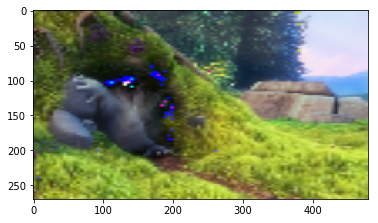

In [48]:
plt.imshow(fin_image)

In [49]:
for k in range(size[0]):
    fin_image=[];
    for i in range(img_r_s[0]):
        c_image=[];
        for j in range(img_r_s[1]):
            c2_mg=[];
            c2_mg.append(red_layer[k][i][j]);
            c2_mg.append(green_layer[k][i][j]);
            c2_mg.append(blue_layer[k][i][j]);
            c2_mg=np.array(c2_mg);
            c_image.append(c2_mg);
        fin_image.append(np.array(c_image));
    fin_image=np.array(fin_image);
    path=storage_path+"//reconstructed_coloured//frame_"+str(k)+".jpg";
    cv2.imwrite(path,fin_image)
print(fin_image.shape)

(270, 480, 3)
